# Disaster Tweet Classification

Tweets from the Twitter API will be used during testing. The neural network will be trained using disaster tweets dataset from kaggle for target values(real disaster or not).

## Twitter API

importing relevant modules

In [1]:
!pip install git+https://github.com/tweepy/tweepy.git
!pip install tqdm

  Cloning https://github.com/tweepy/tweepy.git to c:\users\chand\appdata\local\temp\pip-req-build-30fa0ayn
  Resolved https://github.com/tweepy/tweepy.git to commit 0cd96b1918e5e920eb9f8fe4ba303ab5ec899c65
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git 'C:\Users\chand\AppData\Local\Temp\pip-req-build-30fa0ayn'


In [2]:
import numpy as np 
import pandas as pd 
import tweepy as tw 
from tqdm import tqdm

Twitter API data

In [3]:
consumer_api_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_api_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'

authenticate twitter API account

In [4]:
auth = tw.OAuthHandler(consumer_api_key, consumer_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

Setting search words for the API to retrieve from twitter

In [5]:
tweets_copy = [] #creating a copy of the tweets
hashtags = ['#debris', '#reckage', '#oil spill', '#typhoon', '#evacuated', '#suicide bombing', '#rescuers',
            '#suicide bombers', '#nuclear', '#earthquake', '#floods', '#tsunami'] #Type you keyword here 
for i in hashtags:
    search_words = i + " -filter:retweets"
    tweets = tw.Cursor(api.search_tweets,
                    q=search_words,
                    lang="en",     
                    ).items(200) #enter the number of tweets you want to collect
    for tweet in tqdm(tweets):
        tweets_copy.append(tweet)

65it [00:02, 26.08it/s]
0it [00:00, ?it/s]
8it [00:00,  8.71it/s]
71it [00:02, 27.34it/s]
10it [00:00, 13.62it/s]
0it [00:00, ?it/s]
34it [00:01, 20.78it/s]
0it [00:00, ?it/s]
200it [00:07, 26.69it/s]
200it [00:06, 28.99it/s]
200it [00:06, 31.09it/s]
200it [00:06, 28.76it/s]


In [6]:
print(f"New tweets retrieved: {len(tweets_copy)}")

New tweets retrieved: 988


In [ ]:
tweets_df = pd.DataFrame() #creating a dataframe
for tweet in tweets_copy: #looping through the tweets
    hashtags = [] #creating a list of hashtags
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'id': [tweet.id],
                                               'user_location': tweet.user.location,\
                                               'date': tweet.created_at,
                                               'text': tweet.text, 
                                               'hashtags': [hashtags if hashtags else None]},index=[0]))


In [12]:
tweets_df.head()

,id,user_location,date,text,hashtags
0,1616947767477166080,"The kitchen, at the moment :)",2023-01-21 23:56:03+00:00,@Daren_Mcclimans Two sci-fi shows!\n#ProjectBl...,"[ProjectBlueBook, AidanGillen]"
0,1616945249607204864,,2023-01-21 23:46:03+00:00,@Daren_Mcclimans #Debris should get their own ...,[Debris]
0,1616819875137077251,Email: richard@coilpod.com,2023-01-21 15:27:51+00:00,Anyone doing blast #cleaning of items will wan...,"[cleaning, debris, containment]"
0,1616752322410954755,"Sydney, Australia",2023-01-21 10:59:26+00:00,Debris &amp; Reflection #debris #reflection #c...,"[debris, reflection, countryside, grime]"
0,1616712149996556288,"Goa, India",2023-01-21 08:19:48+00:00,Dumpsite Shocker | #Construction #debris dumpe...,"[Construction, debris, highway, danger]"


keywords in disaster tweets

In [13]:
keywords_data = ['ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging',
       'body bags', 'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned',
       'burning', 'burning buildings', 'bush fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical emergency',
       'cliff fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed', 'derailment', 'desolate', 'desolation',
       'destroy', 'destroyed', 'destruction', 'detonate', 'detonation',
       'devastated', 'devastation', 'disaster', 'displaced', 'drought',
       'drown', 'drowned', 'drowning', 'dust storm', 'earthquake',
       'electrocute', 'electrocuted', 'emergency', 'emergency plan',
       'emergency services', 'engulfed', 'epicentre', 'evacuate',
       'evacuated', 'evacuation', 'explode', 'exploded', 'explosion',
       'eyewitness', 'famine', 'fatal', 'fatalities', 'fatality', 'fear',
       'fire', 'fire truck', 'first responders', 'flames',
       'flattened', 'flood', 'flooding', 'floods', 'forest fire',
       'forest fires', 'hail', 'hailstorm', 'harm', 'hazard',
       'hazardous', 'heat wave', 'hellfire', 'hijack', 'hijacker',
       'hijacking', 'hostage', 'hostages', 'hurricane', 'injured',
       'injuries', 'injury', 'inundated', 'inundation', 'landslide',
       'lava', 'lightning', 'loud bang', 'mass%20murder',
       'mass murderer', 'massacre', 'mayhem', 'meltdown', 'military',
       'mudslide', 'natural disaster', 'nuclear disaster',
       'nuclear reactor', 'obliterate', 'obliterated', 'obliteration',
       'oil spill', 'outbreak', 'pandemonium', 'panic', 'panicking',
       'police', 'quarantine', 'quarantined', 'radiation emergency',
       'rainstorm', 'razed', 'refugees', 'rescue', 'rescued', 'rescuers',
       'riot', 'rioting', 'rubble', 'ruin', 'sandstorm', 'screamed',
       'screaming', 'screams', 'seismic', 'sinkhole', 'sinking', 'siren',
       'sirens', 'smoke', 'snowstorm', 'storm', 'stretcher',
       'structural failure', 'suicide bomb', 'suicide bomber',
       'suicide bombing', 'sunk', 'survive', 'survived', 'survivors',
       'terrorism', 'terrorist', 'threat', 'thunder', 'thunderstorm',
       'tornado', 'tragedy', 'trapped', 'trauma', 'traumatised',
       'trouble', 'tsunami', 'twister', 'typhoon', 'upheaval',
       'violent storm', 'volcano', 'war zone', 'weapon', 'weapons',
       'whirlwind', 'wild fires', 'wildfire', 'windstorm', 'wounded',
       'wounds', 'wreck', 'wreckage', 'wrecked']

counting the number of tweets containing the keywords

In [11]:
import copy
tweet_data = copy.deepcopy(tweets_df)

In [12]:
tweet_data.head()

,id,user_location,date,text,hashtags
0,1608327073264803840,"New Delhi, India",2022-12-29 05:00:30+00:00,Large #constellations come with many benefits ...,"[constellations, debris]"
0,1608326966482186240,"Andheri East, Mumbai 400069",2022-12-29 05:00:04+00:00,Call us at 9892693006 for Quick &amp; Easy Deb...,"[maxcleaningenviro, debris, cleaning, realesta..."
0,1608317599733141504,united kingdom,2022-12-29 04:22:51+00:00,Most #acne #facials claim to reduce acne sympt...,"[acne, facials, debris]"
0,1608157261465255936,"Generally, Seattle, WA",2022-12-28 17:45:43+00:00,.@Walter_Kelley .@BMacTV .@abbyacone the storm...,None
0,1608056347739787266,Portugal,2022-12-28 11:04:44+00:00,US #Senate passes orbit #debris cleanup bill -...,"[Senate, debris]"


In [15]:
count = 0
for i in tweet_data['text']:
    for j in keywords_data:
        if j in i:
            count += 1
print(count)
    

795


Refining dataset and adding a new column (text preprocessing)

keywords_row = []
for i in tweets_df['text']:
  keywords_list=[]
  for j in keywords_data:
    if j in i:
      keywords_list.append(j)
  if len(keywords_list) == 0:
    list_str=NaN
  else:
    list_str = ",".join(keywords_list)
  keywords_row.append(list_str)

In [16]:
keywords_row = []
for i in tweets_df['text']:
  keywords_list=[]
  for j in keywords_data:
    if j in i:
      keywords_list.append(j)
  if len(keywords_list) == 0:
    list_str=None
  else:
    list_str = ",".join(keywords_list)

In [ ]:
tweet_data.insert(loc=1, column='keywords', value=keywords_row)

In [ ]:
tweet_data.to_csv('tweet_testing3.csv')

## Exploratory Data Analysis of tweet_data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
tweet_data.shape

(973, 5)

In [ ]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 0 to 0
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             973 non-null    int64              
 1   keywords       452 non-null    object             
 2   user_location  973 non-null    object             
 3   date           973 non-null    datetime64[ns, UTC]
 4   text           973 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 45.6+ KB


In [ ]:
tweet_data['keywords'].value_counts()

earthquake                             122
flood,floods                            45
tsunami                                 39
debris                                  21
flood                                   19
                                      ... 
damage,earthquake                        1
flood,hazard                             1
earthquake,hazard                        1
earthquake,fire                          1
apocalypse,earthquake,flood,tsunami      1
Name: keywords, Length: 114, dtype: int64

In [ ]:
tweet_data['keywords'].isnull().sum()

521

Heatmap of null value in the dataset

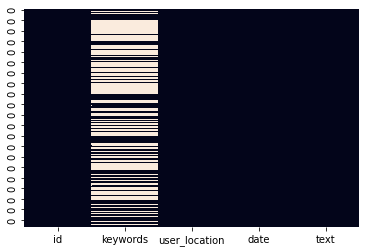

In [ ]:
sns.heatmap(tweet_data.isnull(), cbar=False)

In [ ]:
word_count = []
for tweet in tweet_data['text']:
    word_count.append(len(tweet.split(" ")))


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


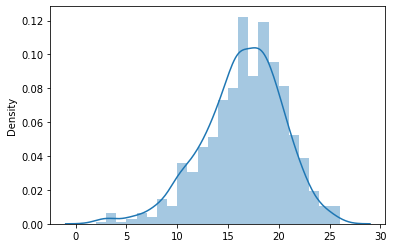

In [ ]:
sns.distplot(word_count)

average number of words in a tweet

In [ ]:
print((sum(word_count)/len(word_count)))

16.38951695786228


## Exploratory Data Analysis of training dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/train.csv')

In [ ]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
train_df.shape

(7613, 5)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


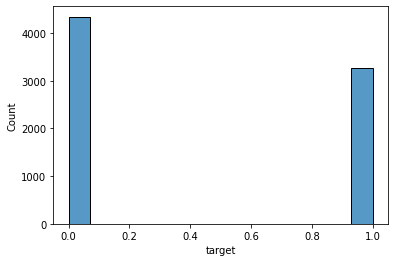

In [ ]:
sns.histplot(train_df['target'])


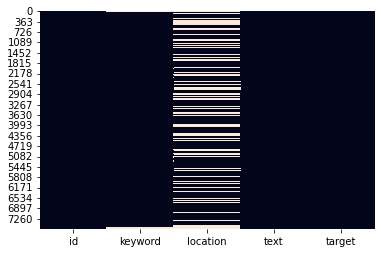

In [ ]:
sns.heatmap(train_df.isnull(), cbar=False)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


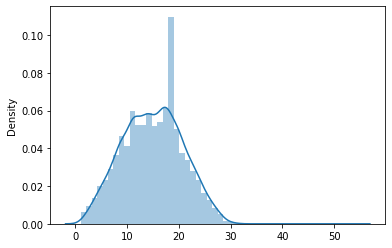

In [ ]:
word_count_train = []
for tweet in train_df['text']:
    word_count_train.append(len(tweet.split(" ")))
sns.distplot(word_count_train)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

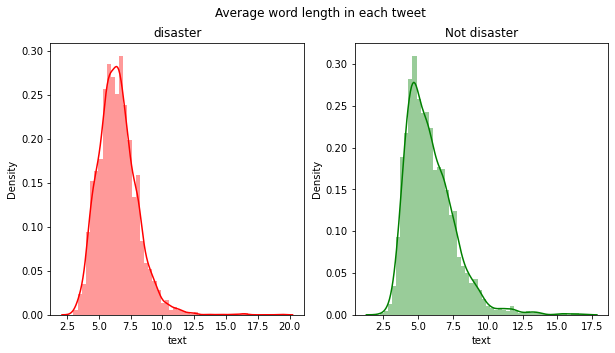

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_df[train_df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train_df[train_df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

## Data Cleaning and Preprocessing

Common steps for data cleaning on the NLP task dealing with tweets are removing special characters, removing stop words, removing URLs, removing numbers, and doing word stemming.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
#stop=set(stopwords.words('english'))
import nltk
nltk.download('stopwords')
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### combining both our train and tweets dataset for cleaning

In [ ]:
df=pd.concat([train_df,tweet_data])
df.shape

(8586, 8)

Removing URLs

In [ ]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'New competition launched :'

In [ ]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

### Removing HTML tags

In [ ]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

In [ ]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [ ]:
df['text']=df['text'].apply(lambda x : remove_html(x))

### Removing emojis

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [ ]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

### Removing puncutations

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="#EARTHQUAKE IN #newdelhi"
print(remove_punct(example))

EARTHQUAKE IN newdelhi


In [ ]:
df['text']=df['text'].apply(lambda x : remove_punct(x))

### Spelling Cheker

In [ ]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "eartquake in neu delhi"
correct_spellings(text)

'earthquake in new delhi'

### Vectorization using GloVe

Here we will use GloVe pretrained corpus model to represent our words. Here we will try 300 D version

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2022-12-09 17:39:53--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-09 17:39:53--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-09 17:39:54--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

In [ ]:
!unzip /content/glove.6B.zip.2

Archive:  /content/glove.6B.zip.2
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
%ls

glove.42B.300d.zip    glove.6B.200d.txt  glove.6B.zip    sample_data/
glove.42B.300d.zip.1  glove.6B.300d.txt  glove.6B.zip.1  train.csv
glove.6B.100d.txt     glove.6B.50d.txt   glove.6B.zip.2  tweet_testing3.csv


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop=set(stopwords.words('english'))

This function is create a corpus (a collection of texts) from a dataframe of tweets. The function tokenizes the tweets by splitting them into individual words, removes any words that are not alphabetical or are stop words (common words that are often excluded from natural language processing tasks because they don't provide much useful information), and converts all remaining words to lowercase. The resulting list of words for each tweet is added to the corpus list, which is returned by the function.

In [ ]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [ ]:
corpus=create_corpus(df)

100%|██████████| 8586/8586 [00:02<00:00, 4291.72it/s]


 Word embedding models map words to numerical vectors that capture semantic information about the words. The code reads in each line of the file, which contains a word followed by its corresponding numerical vector representation. It then adds the word and its vector to a dictionary called embedding_dict, with the word as the key and the vector as the value. Finally, the file is closed.

In [ ]:
embedding_dict={}
with open('/content/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

 It first creates a Tokenizer object, which is a class that can be used to tokenize (or split) a text into individual words or tokens. The fit_on_texts method is then called on this object, which updates the tokenizer with the vocabulary from the corpus of texts.

Next, the texts_to_sequences method is called on the tokenizer to convert the text in the corpus to sequences of numbers, where each number represents a word in the vocabulary. This allows the text data to be used as input to a model that expects numerical data.

Finally, the pad_sequences function is called on the sequences of numbers to ensure that all sequences in the corpus have the same length. This is done by either truncating (shortening) longer sequences or padding (adding) shorter sequences with zeros to reach the desired length of MAX_LEN (which is set to 50 in this code). This is necessary because many models expect input data to have a fixed length.

In [ ]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

The word_index property of a Tokenizer object maps words in the vocabulary to their corresponding numerical indices (or index numbers). This line of code creates a word_index dictionary from the tokenizer_obj object. This dictionary can be used to look up the index of a given word in the vocabulary. For example, if the word_index dictionary contains the entry {'the': 1}, this means that the word "the" has an index of 1. This can be useful when working with the sequences of numbers generated by the Tokenizer object.

In [ ]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 17720


In [ ]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 17720/17720 [00:00<00:00, 370079.50it/s]


## LSTM model

In [ ]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           1772100   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,814,405
Trainable params: 42,305
Non-trainable params: 1,772,100
_________________________________________________________________


In [ ]:
train=tweet_pad[:train_df.shape[0]]
test=tweet_pad[tweet_data.shape[0]:]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train,train_df['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [ ]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)

Epoch 1/15
1618/1618 - 279s - loss: 0.6829 - accuracy: 0.5766 - val_loss: 0.6404 - val_accuracy: 0.5709 - 279s/epoch - 172ms/step
Epoch 2/15
1618/1618 - 274s - loss: 0.5758 - accuracy: 0.7252 - val_loss: 0.5336 - val_accuracy: 0.7820 - 274s/epoch - 169ms/step
Epoch 3/15
1618/1618 - 274s - loss: 0.5409 - accuracy: 0.7531 - val_loss: 0.5131 - val_accuracy: 0.7916 - 274s/epoch - 169ms/step
Epoch 4/15
1618/1618 - 275s - loss: 0.5243 - accuracy: 0.7673 - val_loss: 0.4951 - val_accuracy: 0.7925 - 275s/epoch - 170ms/step
Epoch 5/15
1618/1618 - 286s - loss: 0.5234 - accuracy: 0.7602 - val_loss: 0.4822 - val_accuracy: 0.7995 - 286s/epoch - 177ms/step
Epoch 6/15
1618/1618 - 284s - loss: 0.5068 - accuracy: 0.7758 - val_loss: 0.4740 - val_accuracy: 0.8039 - 284s/epoch - 175ms/step
Epoch 7/15
1618/1618 - 271s - loss: 0.4987 - accuracy: 0.7806 - val_loss: 0.4622 - val_accuracy: 0.8074 - 271s/epoch - 168ms/step
Epoch 8/15
1618/1618 - 274s - loss: 0.4984 - accuracy: 0.7787 - val_loss: 0.4562 - val_acc

In [ ]:
model.save('LSTM_model.py')

In [ ]:
from google.colab import files
files.download('/content/LSTM_model.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pre=model.predict(test)

238/238 [==============================] - 4s 16ms/step


In [ ]:
y_predicted = [1 if each >0.5 else 0 for each in y_pre]

In [ ]:
y_predicted[:20]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,


In [ ]:
score, test_accuracy = model.evaluate(X_test, y_test, batch_size=10000)
print("Test Accuracy: ", test_accuracy)

1/1 [==============================] - 0s 122ms/step - loss: 0.4372 - accuracy: 0.8179
Test Accuracy:  0.817863404750824
